In [110]:
import pandas as pd
import numpy as np

import ptitprince as pt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [214]:
har_data = pd.read_parquet('data/train_data.parquet')
body_acc_x = pd.read_csv('data/train/body_acc_x_train.txt', sep='\s+', header=None)
y_train = pd.read_csv('data/train/y_train.txt', sep='\s+', header=None)

y_train_labels = pd.read_csv('data/activity_labels.txt', delim_whitespace=True, header=None)
y_train_labels = y_train_labels[1].tolist()
y_train[0] = y_train[0].map(lambda x: y_train_labels[x-1])

body_acc_x["activity"] = y_train

In [210]:
har_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [215]:
body_acc_x.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,activity
0,0.000181,0.010139,0.009276,0.005066,0.010810,0.004045,0.004757,0.006214,0.003307,0.007572,...,-0.001509,0.000060,0.000435,-0.000819,0.000228,-0.000300,-0.001147,-0.000222,0.001576,STANDING
1,0.001094,0.004550,0.002879,0.002247,0.003305,0.002416,0.001619,0.000981,0.000009,-0.000363,...,-0.000141,0.001333,0.001541,0.001077,-0.000736,-0.003767,-0.004646,-0.002941,-0.001599,STANDING
2,0.003531,0.002285,-0.000420,-0.003738,-0.006706,-0.003148,0.000733,0.000668,0.002162,-0.000946,...,0.001853,-0.000268,-0.000394,-0.000279,-0.000316,0.000144,0.001246,0.003117,0.002178,STANDING
3,-0.001772,-0.001311,0.000388,0.000408,-0.000355,0.000998,0.001109,-0.003149,-0.008882,-0.010483,...,0.002103,0.001358,0.000820,-0.000212,-0.001915,-0.001631,-0.000867,-0.001172,-0.000028,STANDING
4,0.000087,-0.000272,0.001022,0.003126,0.002284,0.000885,0.001933,0.002270,0.002247,0.002175,...,0.003518,-0.000248,-0.002761,0.000252,0.003752,0.001626,-0.000698,-0.001223,-0.003328,STANDING


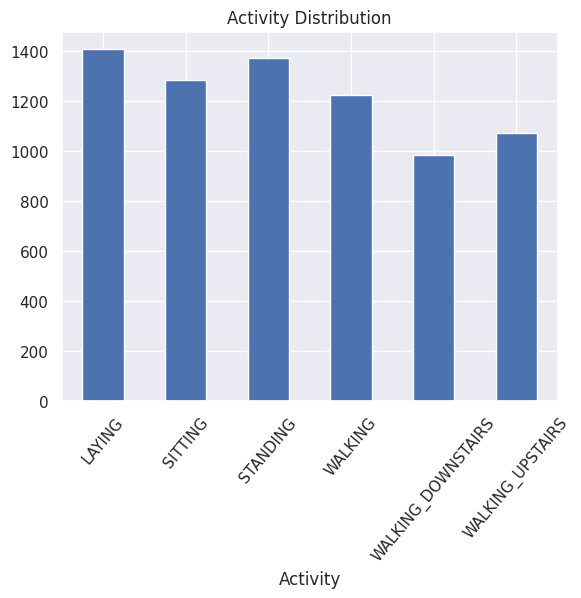

In [52]:
(
    har_data
    .groupby('activity')
    [["activity"]]
    .count()
    .plot(kind="bar", 
          rot=50, 
          legend=False, 
          xlabel="Activity", 
          title="Activity Distribution")
)
plt.show()

Looking at the above graph we see that there's an equal distribution of the target variable in the training set. Except for the 'DOWNSTARIS' and 'UPSTAIRS' classes these are a bit less than the rest.

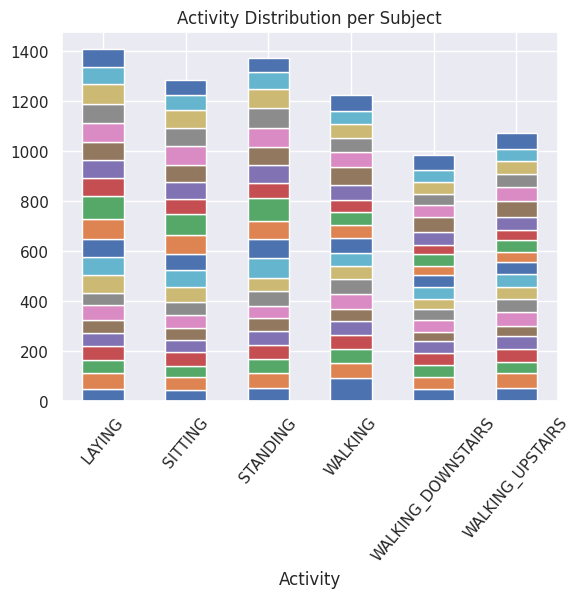

In [50]:
(
    har_data
    .groupby(["activity", "subject"])
    [["activity"]]
    .count()
    .unstack()
    .plot(kind="bar", 
          rot=50, 
          stacked=True, 
          legend=False, 
          xlabel="Activity", 
          title="Activity Distribution per Subject")
)
plt.show()

Now, we looked at the distribution of the activites across the subjects. Here, we wanted to see if a certain activity was dominated by a certain subject. We see that the distribution is pretty even across the subjects. This is good because we don't want our activity to be dominated by a certain subject. This way we can generalize our model better.

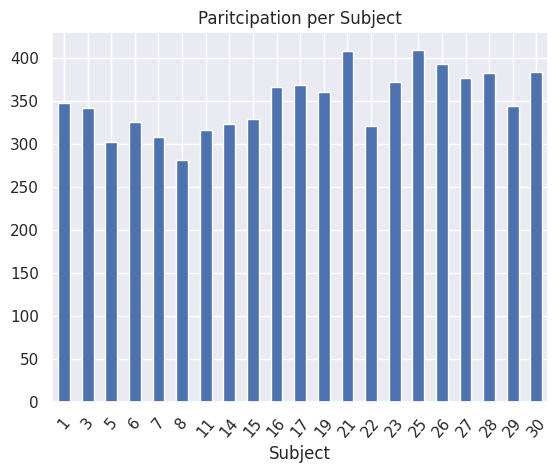

In [82]:
(
    har_data
    .groupby(["subject"])
    [["subject"]]
    .count()
    .plot(kind="bar", 
          rot=50, 
          stacked=True, 
          legend=False, 
          xlabel="Subject", 
          title="Paritcipation per Subject")
)
plt.show()

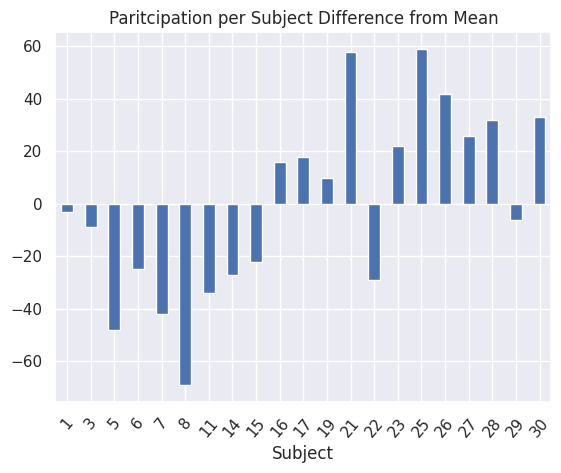

In [85]:
(
    har_data
    .groupby(["subject"])
    [["subject"]]
    .count()
    .apply(lambda x: x - np.mean(x))
    .plot(kind="bar", 
          rot=50, 
          stacked=True, 
          legend=False, 
          xlabel="Subject", 
          title="Paritcipation per Subject Difference from Mean")
)
plt.show()

The above two graphs gives us an insight about the number of readings from each subject. We see that the number of readings from each subject is not really even. However, we think that it's kinda acceptable as the difference is not that big.

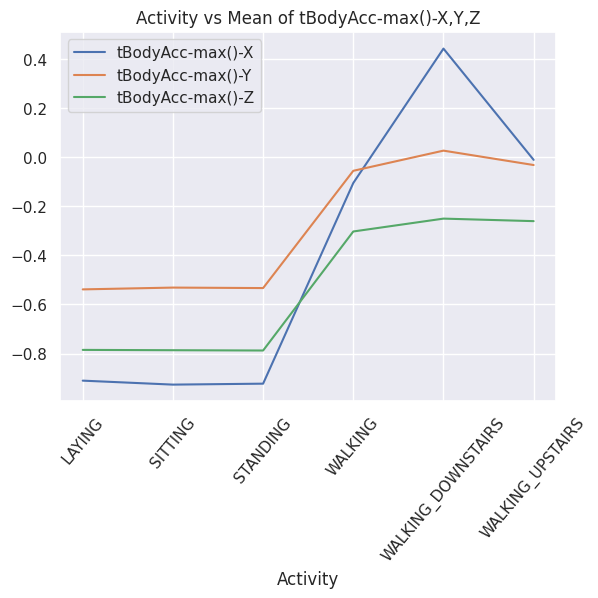

In [162]:
(
    har_data
    .groupby('activity')
    [["activity", 
      "tBodyAcc-max()-X",
      "tBodyAcc-max()-Y",
      "tBodyAcc-max()-Z",]]
    .mean(numeric_only=True)
    .plot(rot=50, 
          xlabel="Activity", 
          title="Activity vs Mean of tBodyAcc-max()-X,Y,Z")
)
plt.show()

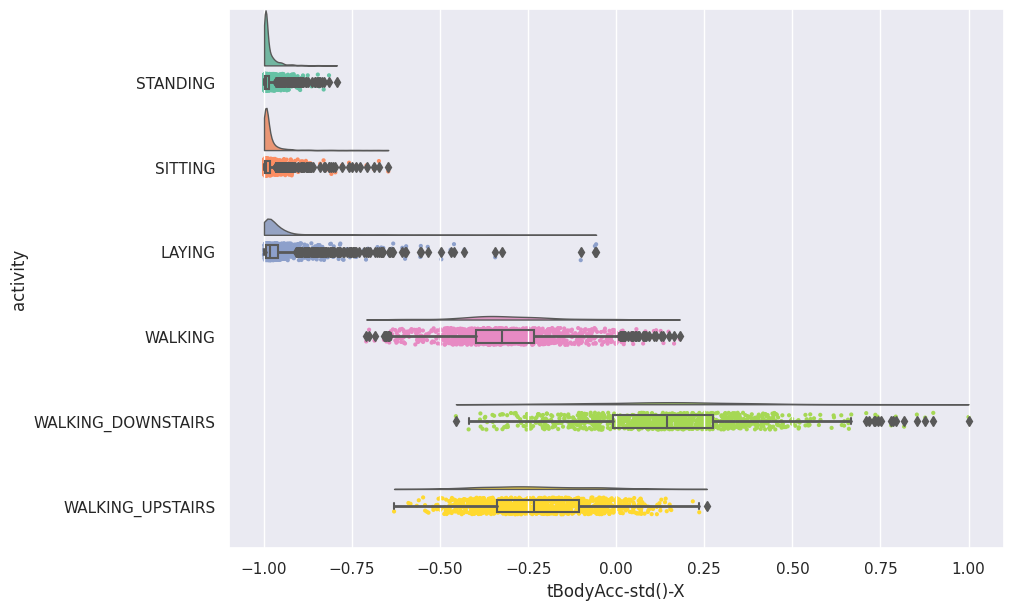

In [297]:
f, ax = plt.subplots(figsize=(10, 7))

pt.RainCloud(data=har_data,
            x='activity',
            y='tBodyAcc-std()-X',
            orient='h',
            width_viol=1.3,
            ax=ax)
plt.show()

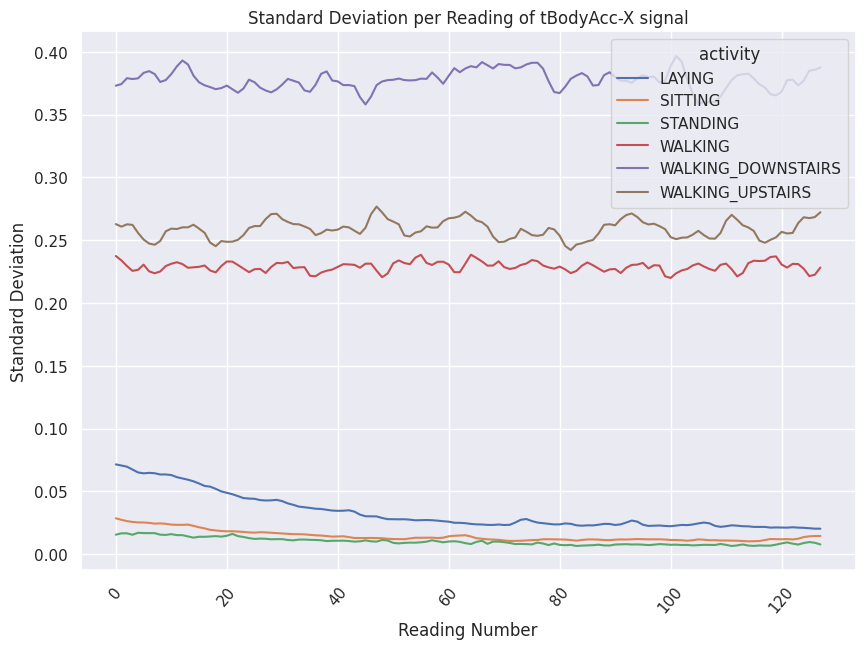

In [296]:
(
    body_acc_x
    .groupby('activity')
    .std(numeric_only=True)
    .transpose()
    # [["LAYING", "SITTING", "STANDING"]]
    # [["WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS", "WALKING"]]
    .plot(rot=50,
            xlabel="Reading Number",
            ylabel = "Standard Deviation",
            figsize=(10, 7),
            title="Standard Deviation per Reading of tBodyAcc-X signal")
)
plt.show()